# Context and Defining Problem Statement

To predict the concrete strength using the data available in file concrete_data.xls. Apply
feature engineering and model tuning to obtain 80% to 95% of R2score.

# Steps - 
- Data loading and preprocessing
- Exploratory Data Analysis (Univariate and Bivariate)
- Model building and evaluation
- Model Tuning

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [82]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity
sns.set(color_codes=True)

### 2. Import the dataframes that are needed
- Import "concrete.csv" 

In [83]:
df = pd.read_csv("concrete.csv")  # Read the data regarding customer attributes

# Univariate Data Analysis

### 3. Explore the data

In [84]:
print(df.shape)
df.head()  

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### 4. Missing values and data distribution

In [85]:
print("Null in any column? ", df.isnull().values.any())
print()
df.describe().transpose()

Null in any column?  False



,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### 5. Range & Outliers Analysis

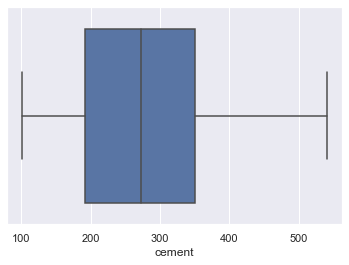

In [86]:
sns.boxplot(df['cement'])

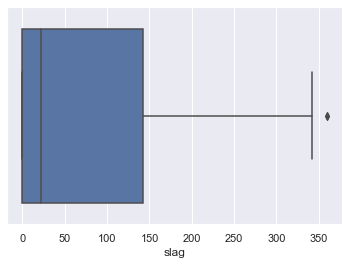

In [87]:
sns.boxplot(df['slag'])

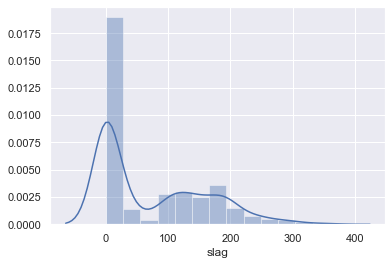

In [88]:
sns.distplot(df['slag'])

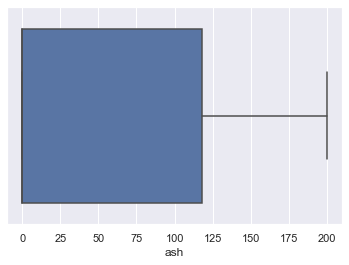

In [89]:
sns.boxplot(df['ash'])

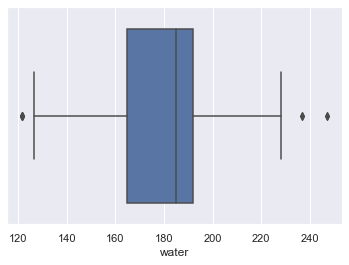

In [90]:
sns.boxplot(df['water'])

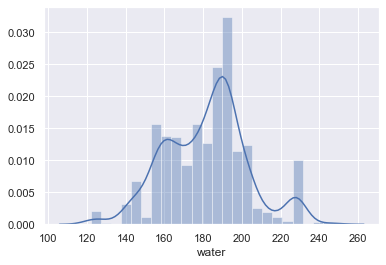

In [91]:
sns.distplot(df['water'])

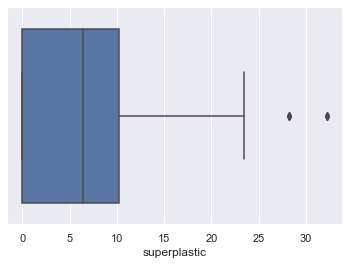

In [92]:
sns.boxplot(df['superplastic'])

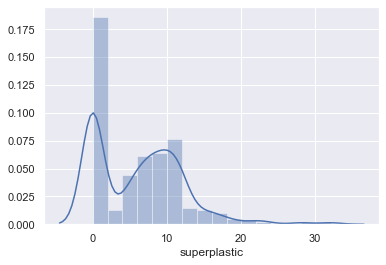

In [93]:
sns.distplot(df['superplastic'])

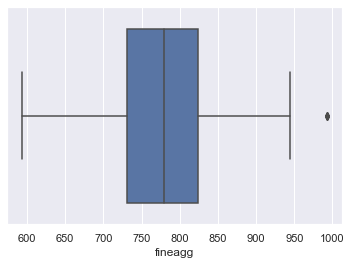

In [94]:
sns.boxplot(df['fineagg'])

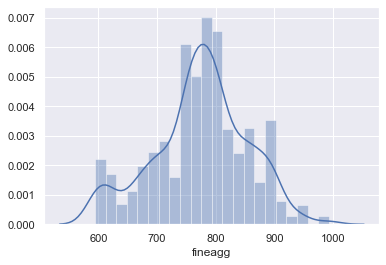

In [95]:
sns.distplot(df['fineagg'])

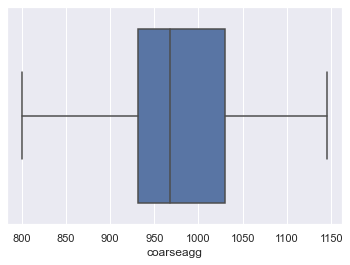

In [121]:
sns.boxplot(df['coarseagg'])

In [96]:
sns.boxplot(df['age'])

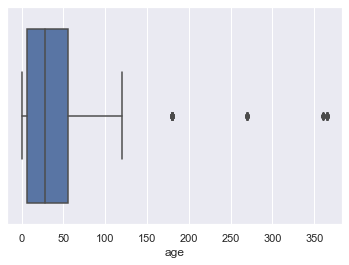

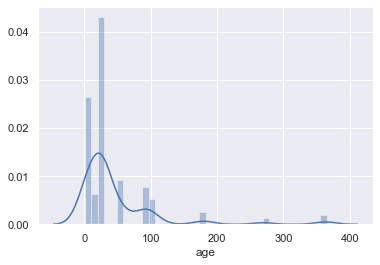

In [97]:
sns.distplot(df['age'])

### 5. Zeroes in the columns

In [98]:
(df == 0).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [99]:
# seems like zeroes can be valid values, since some of the material can be non-present

# Bi-Variate Data Analysis

### 6. Print correlation

In [100]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [101]:
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


- Seems like Strength has some good correlation with cement, slag, superplastic and age.

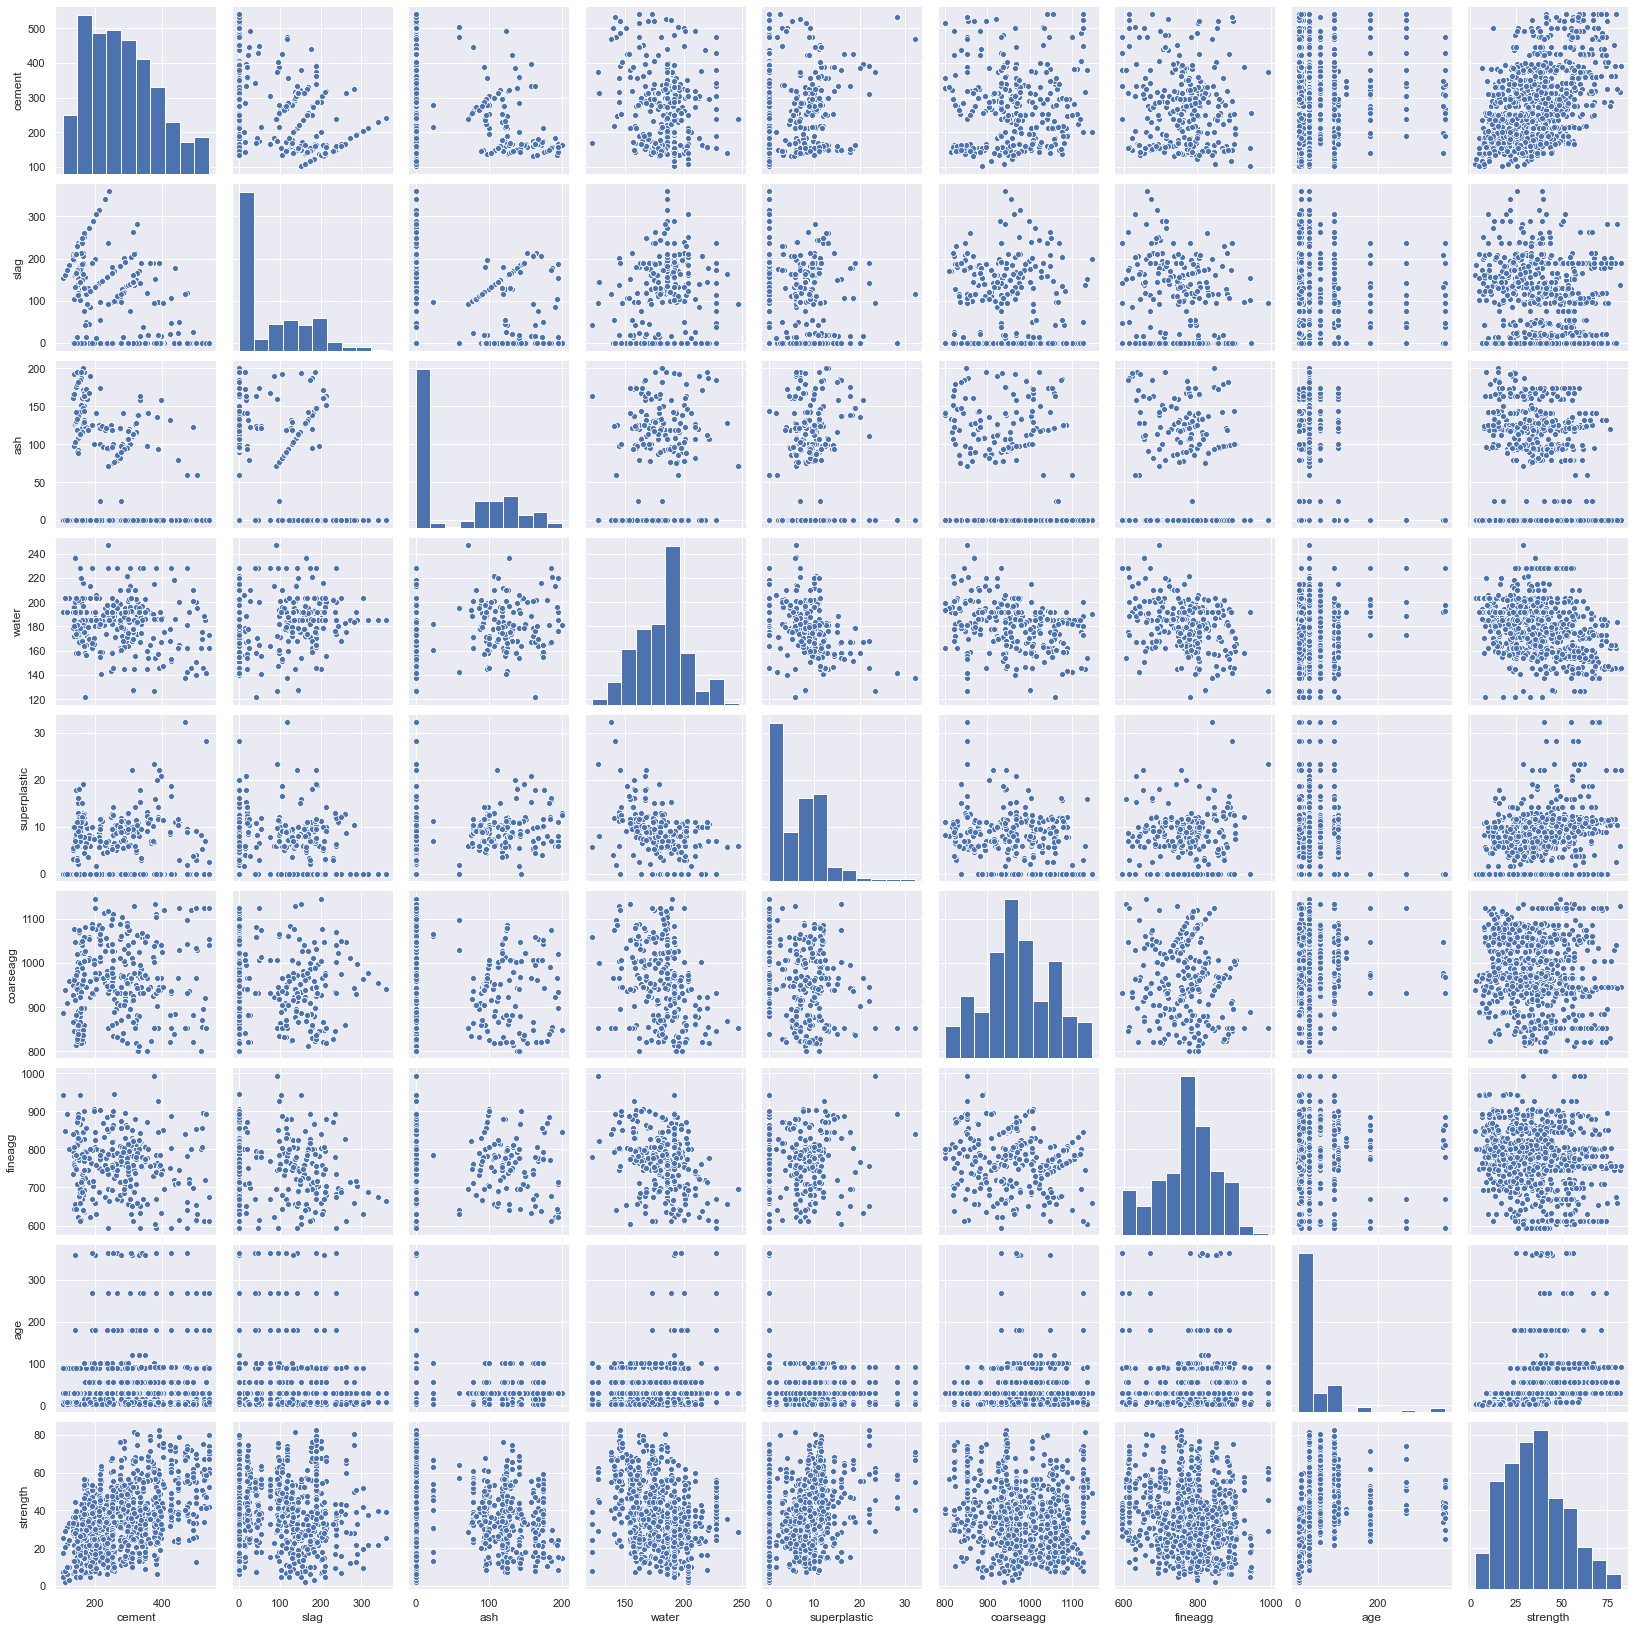

In [104]:
sns.pairplot(df)

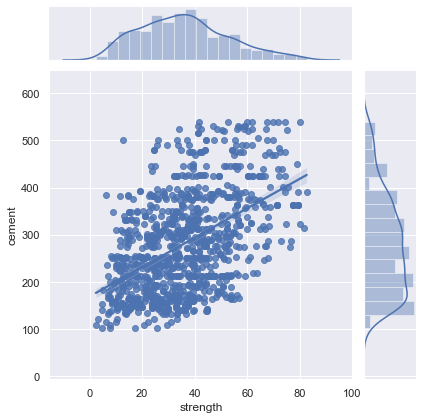

In [115]:
g = sns.JointGrid(x="strength", y="cement", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can observe there is somewhat linear relationship between cement and strength

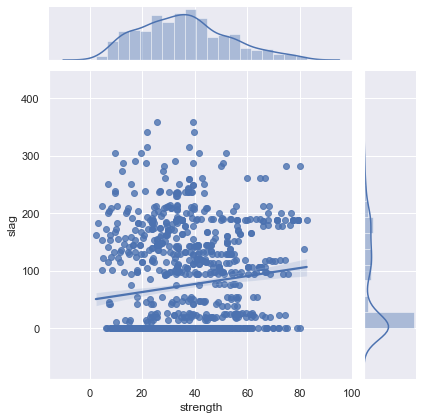

In [112]:
g = sns.JointGrid(x="strength", y="slag", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can observe slag between 0 to 200 has most of the strength concentrated, but the correlation is not that strong.

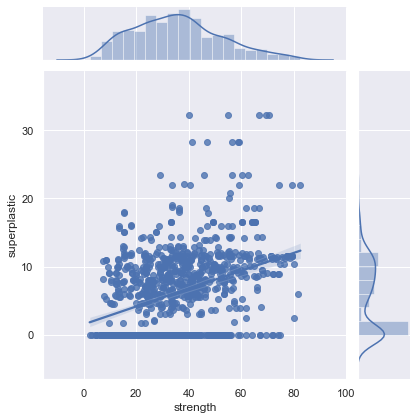

In [113]:
g = sns.JointGrid(x="strength", y="superplastic", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can observe there is somewhat linear relationship between superplastic and strength, when superplastic is between 0 to 15 approximately 

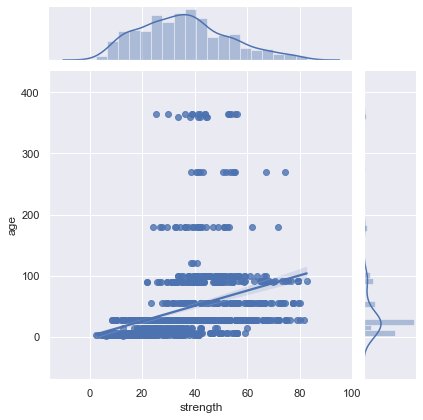

In [123]:
g = sns.JointGrid(x="strength", y="age", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can observe there is somewhat linear relationship between age and strength; but there are lot of outliers as well

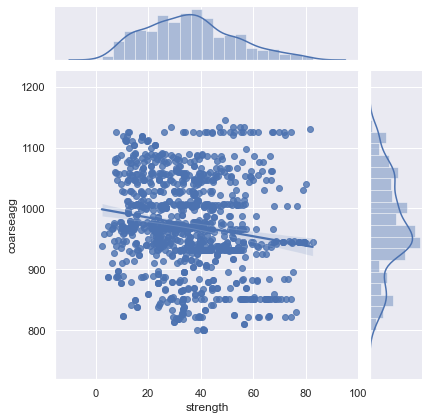

In [127]:
g = sns.JointGrid(x="strength", y="coarseagg", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can clearly see a negative correlation here, this feature may not be important

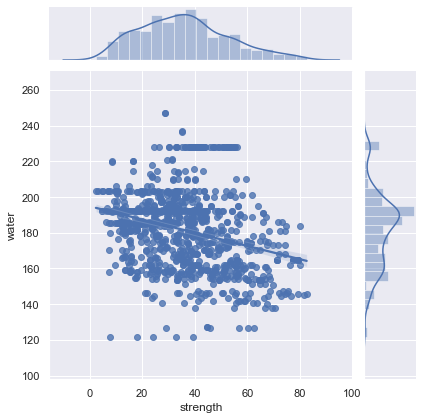

In [129]:
g = sns.JointGrid(x="strength", y="water", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can clearly see a negative correlation here, this feature may not be important

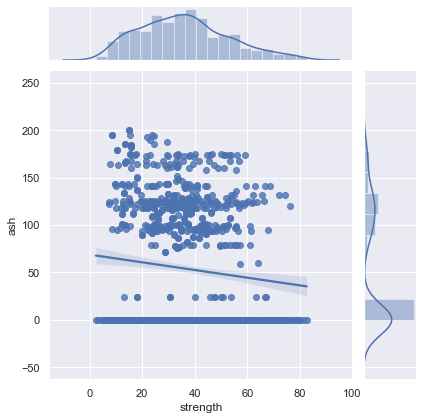

In [130]:
g = sns.JointGrid(x="strength", y="ash", data=df)
g = g.plot(sns.regplot, sns.distplot)

# we can see a somewhat negative correlation here, this feature may not be important; lot of data is just scattered 

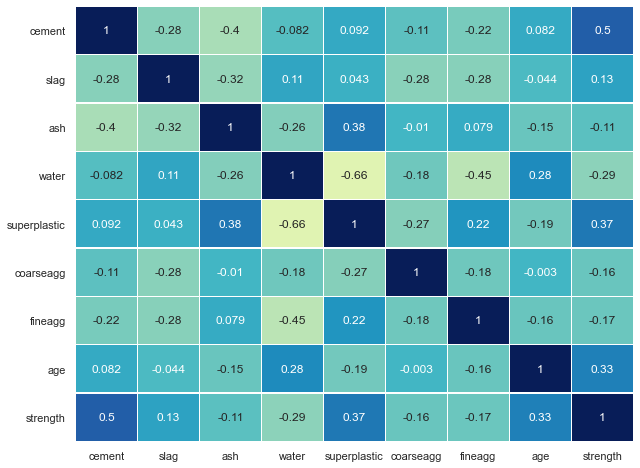

In [122]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [120]:
# from the heatmap the darker the blue the more strong the relationship is... 
# for example between superplastic and ash, water and age there is strong indication of correlation.
# While higher strength shows correlation with age, superplastic and cement.

# seems like ash, coarseagg, fineagg and water has negative correlation 

### 7. Feature Engineering 

In [185]:
# as discussed in previous section some variables like water, ash, coarseagg and fineagg are not looking very useful,
# these variables can be dropped, since they shows negative correlation 

dfn = df.drop(['ash', 'coarseagg', 'fineagg', 'water'], axis=1)

dfn

,cement,slag,superplastic,age,strength
0,141.3,212.0,0.0,28,29.89
1,168.9,42.2,10.8,14,23.51
2,250.0,0.0,5.5,28,29.22
3,266.0,114.0,0.0,28,45.85
4,154.8,183.4,9.1,28,18.29
...,...,...,...,...,...
1025,135.0,0.0,10.0,28,13.29
1026,531.3,0.0,28.2,3,41.30
1027,276.4,116.0,8.9,28,44.28
1028,342.0,38.0,0.0,270,55.06


# Model building and evaluation

In [205]:
from sklearn.model_selection import train_test_split 

features = [col for col in dfn.columns if col != 'strength']

Logistic Regression

In [206]:
#Logistic Regression with only feedback columns
from sklearn.linear_model import LinearRegression #importing logistic regression

x_train, x_test, y_train, y_test = train_test_split(dfn[features], dfn['strength'], random_state=22)

lr = LinearRegression()

lr.fit(x_train, y_train)

pred = lr.predict(x_test)  # Predictions from logistic regression
score1 = lr.score(x_test, y_test)
score1

0.5485397724740628

Decision Tree

In [207]:
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(dfn[features], dfn['strength'], random_state = 10)

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

score2 = dt.score(x_test, y_test)
pred = dt.predict(x_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8144844512694658


Random Forest

In [208]:
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(dfn[features], dfn['strength'], random_state = 30)

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

score3 = rf.score(x_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.8748197542146103


### 18. Print feature importance
- Print feature importance of Random Forest



In [209]:
#Linear Regression 
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

coefficients

,0,0
0,cement,0.081947
1,slag,0.056452
2,superplastic,0.979635
3,age,0.088057


In [210]:
#Decision Tree 
pd.Series(dt.feature_importances_, x_train.columns ).sort_values(ascending= False)

cement          0.387537
age             0.313400
superplastic    0.157276
slag            0.141787
dtype: float64

In [211]:
#RandomForest
pd.Series(rf.feature_importances_, x_train.columns).sort_values(ascending= False)

cement          0.402215
age             0.345945
superplastic    0.139730
slag            0.112111
dtype: float64

# Model Tuning

### Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [212]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score4 = cross_val_score(dt, x_train, y_train, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.7944994240634186


In [213]:
#Random Forest rf
score5 = cross_val_score(rf, x_train, y_train, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.8715712230867586


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [214]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(x_train, y_train)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 50,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
# 'n_estimators': 100}


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    7.6s finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [215]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 50,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100)


score6 = cross_val_score(rf, x_train, y_train, cv = 5).mean()


score6
    

0.8726407113719328

In [216]:
data = {'Technique' : ['Linear Regression', 'Decision tree',
                       'Random forest', 'DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6] }

result = pd.DataFrame(data)

In [217]:
result

,Technique,Score
0,Linear Regression,0.548540
1,Decision tree,0.820413
2,Random forest,0.881671
3,DT CV,0.790003
4,RF CV,0.874727
5,Tuned RF CV,0.872641


# Conclusion:

- Given some data, we have seen how to perform EDA for that dataset
- The data that we had was continuous and quantitative. 
- We used the box plots, pairplots, distplots, jointgrid and heatmap; which shows that cement, age, superplastic and slag was more relevent in correlation.
- Some variables like water was showing negative correlations so we have removed them from feature set.
- Beyond EDA, we have seen how to preprocess data and train Supervised Models with it
- We finally built linear regression, decision tree, rainforest and cross validation techniques including gridsearch. 
- Our tuned rain-forest model has accuracy score of 87%, we have also shown comparison of all model scores.